In [1]:
from PIL import Image
import gymnasium as gym
import warnings
warnings.filterwarnings('ignore')
import torch
import matplotlib.pyplot as plt

In [2]:
#env = gym.make('CartPole-v1', render_mode='rgb_array')
#env.reset()
#Image.fromarray(env.render()).show()


In [ ]:
#gym.envs.registry.items()

In [3]:
env = gym.make('CartPole-v1')#, render_mode='human')
state = env.reset()
#env.render()

state[0]

array([-0.03016559,  0.00242393, -0.00933757, -0.03372373], dtype=float32)

In [4]:
n_state = env.observation_space.shape[0]
n_state

4

In [5]:
n_action = env.action_space.n
n_action

2

In [6]:
type(state[0])

numpy.ndarray

In [7]:
state = torch.from_numpy(env.reset()[0]).float()
state

tensor([-0.0047,  0.0228,  0.0238,  0.0115])

In [8]:
weight = torch.rand(n_state, n_action)
weight

tensor([[0.4598, 0.0036],
        [0.1951, 0.5108],
        [0.6452, 0.6991],
        [0.7138, 0.3332]])

In [9]:
state_max = torch.matmul(state, weight)# скалярное произведение
state_max

tensor([0.0259, 0.0321])

In [10]:
action = torch.argmax(state_max)
action.item()

1

In [11]:
def run_episode(env, weight, threshold = 1000):
    state = env.reset()[0]
    reward_sum = 0
    is_done = False
    is_break = False
    num_step = 0
    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))
        state, reward, is_done, is_break, info = env.step(action.item())
        reward_sum += reward
        
        num_step += 1
        if num_step > threshold:
            print('Много шагов {} - '.format(reward_sum))
            reward_sum = 0
            break

    return reward_sum, num_step

In [12]:

total_rewards = []
best_total_reward = 0
best_weight = None


for num in range(1000):
    weight = torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 10000)

    best_total_reward = reward_sum
    best_weight = weight

    print('Эпизод {}: {} - step {}'.format(num+1, reward_sum, count_step))
    if reward_sum > 0:
        total_rewards.append(reward_sum)




Эпизод 1: 8.0 - step 8
Эпизод 2: 10.0 - step 10
Эпизод 3: 65.0 - step 65
Эпизод 4: 9.0 - step 9
Эпизод 5: 10.0 - step 10
Эпизод 6: 9.0 - step 9
Эпизод 7: 9.0 - step 9
Эпизод 8: 51.0 - step 51
Эпизод 9: 10.0 - step 10
Эпизод 10: 9.0 - step 9
Эпизод 11: 122.0 - step 122
Эпизод 12: 10.0 - step 10
Эпизод 13: 8.0 - step 8
Эпизод 14: 9.0 - step 9
Эпизод 15: 9.0 - step 9
Эпизод 16: 10.0 - step 10
Эпизод 17: 43.0 - step 43
Эпизод 18: 8.0 - step 8
Эпизод 19: 8.0 - step 8
Эпизод 20: 9.0 - step 9
Эпизод 21: 9.0 - step 9
Эпизод 22: 43.0 - step 43
Эпизод 23: 190.0 - step 190
Эпизод 24: 9.0 - step 9
Эпизод 25: 10.0 - step 10
Эпизод 26: 10.0 - step 10
Эпизод 27: 97.0 - step 97
Эпизод 28: 41.0 - step 41
Эпизод 29: 124.0 - step 124
Эпизод 30: 47.0 - step 47
Эпизод 31: 70.0 - step 70
Эпизод 32: 10.0 - step 10
Эпизод 33: 31.0 - step 31
Эпизод 34: 134.0 - step 134
Эпизод 35: 10.0 - step 10
Эпизод 36: 76.0 - step 76
Эпизод 37: 98.0 - step 98
Эпизод 38: 95.0 - step 95
Эпизод 39: 10.0 - step 10
Эпизод 40: 32

In [13]:

sum(total_rewards)/len(total_rewards)

57.467

In [14]:
best_total_reward

9.0

In [15]:
best_weight

tensor([[0.3589, 0.0792],
        [0.6514, 0.1156],
        [0.8976, 0.0653],
        [0.7992, 0.1977]])

In [16]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 9.0
Эпизод 2: 9.0
Эпизод 3: 9.0
Эпизод 4: 10.0
Эпизод 5: 8.0
Эпизод 6: 9.0
Эпизод 7: 8.0
Эпизод 8: 9.0
Эпизод 9: 9.0
Эпизод 10: 10.0
Эпизод 11: 8.0
Эпизод 12: 9.0
Эпизод 13: 10.0
Эпизод 14: 9.0
Эпизод 15: 8.0
Эпизод 16: 9.0
Эпизод 17: 8.0
Эпизод 18: 9.0
Эпизод 19: 8.0
Эпизод 20: 8.0
Эпизод 21: 8.0
Эпизод 22: 8.0
Эпизод 23: 9.0
Эпизод 24: 9.0
Эпизод 25: 10.0
Эпизод 26: 9.0
Эпизод 27: 9.0
Эпизод 28: 9.0
Эпизод 29: 8.0
Эпизод 30: 9.0
Эпизод 31: 10.0
Эпизод 32: 9.0
Эпизод 33: 8.0
Эпизод 34: 9.0
Эпизод 35: 9.0
Эпизод 36: 8.0
Эпизод 37: 8.0
Эпизод 38: 9.0
Эпизод 39: 8.0
Эпизод 40: 10.0
Эпизод 41: 9.0
Эпизод 42: 9.0
Эпизод 43: 8.0
Эпизод 44: 9.0
Эпизод 45: 8.0
Эпизод 46: 10.0
Эпизод 47: 9.0
Эпизод 48: 9.0
Эпизод 49: 9.0
Эпизод 50: 9.0
Эпизод 51: 9.0
Эпизод 52: 9.0
Эпизод 53: 9.0
Эпизод 54: 9.0
Эпизод 55: 9.0
Эпизод 56: 9.0
Эпизод 57: 8.0
Эпизод 58: 8.0
Эпизод 59: 9.0
Эпизод 60: 9.0
Эпизод 61: 9.0
Эпизод 62: 10.0
Эпизод 63: 9.0
Эпизод 64: 9.0
Эпизод 65: 9.0
Эпизод 66: 9.0
Эпизод 67: 

In [17]:
sum(total_rewards_eval)/len(total_rewards_eval)

8.9

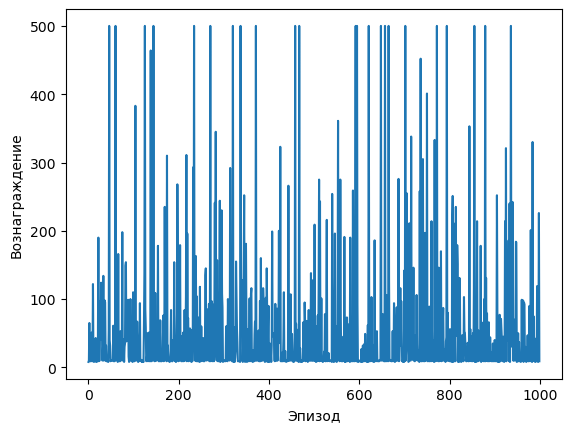

In [18]:

plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [19]:
total_rewards = []
best_total_reward = 0
best_weight = torch.rand(n_state, n_action).float()
noise_scale = 0.01

for num in range(1000):
    weight = best_weight + noise_scale * torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 202)
    if reward_sum > 0:
        if reward_sum >= best_total_reward:
            best_total_reward = reward_sum
            best_weight = weight
            noise_scale = max(noise_scale * 0.5, 0.0001)
            #noise_scale = max(noise_scale - 0.001, 0.0001)
        else:
            noise_scale = min(noise_scale * 2, 2)
            #noise_scale = min(noise_scale + 0.001, 2)
        total_rewards.append(reward_sum)
    else:
        noise_scale = max(noise_scale * 0.5, 0.0001)
        #noise_scale = max(noise_scale - 0.001, 0.0001)

    print('Эпизод {}: {} - step {} - noise {}'.format(num+1, reward_sum, count_step, noise_scale))


Эпизод 1: 10.0 - step 10 - noise 0.005
Эпизод 2: 10.0 - step 10 - noise 0.0025
Эпизод 3: 10.0 - step 10 - noise 0.00125
Эпизод 4: 10.0 - step 10 - noise 0.000625
Эпизод 5: 10.0 - step 10 - noise 0.0003125
Эпизод 6: 10.0 - step 10 - noise 0.00015625
Эпизод 7: 9.0 - step 9 - noise 0.0003125
Эпизод 8: 10.0 - step 10 - noise 0.00015625
Эпизод 9: 10.0 - step 10 - noise 0.0001
Эпизод 10: 11.0 - step 11 - noise 0.0001
Эпизод 11: 10.0 - step 10 - noise 0.0002
Эпизод 12: 9.0 - step 9 - noise 0.0004
Эпизод 13: 10.0 - step 10 - noise 0.0008
Эпизод 14: 10.0 - step 10 - noise 0.0016
Эпизод 15: 9.0 - step 9 - noise 0.0032
Эпизод 16: 10.0 - step 10 - noise 0.0064
Эпизод 17: 10.0 - step 10 - noise 0.0128
Эпизод 18: 9.0 - step 9 - noise 0.0256
Эпизод 19: 10.0 - step 10 - noise 0.0512
Эпизод 20: 10.0 - step 10 - noise 0.1024
Эпизод 21: 9.0 - step 9 - noise 0.2048
Эпизод 22: 10.0 - step 10 - noise 0.4096
Эпизод 23: 10.0 - step 10 - noise 0.8192
Эпизод 24: 10.0 - step 10 - noise 1.6384
Эпизод 25: 106.0 - 

In [20]:
sum(total_rewards)/len(total_rewards)

163.27179487179487

In [21]:
best_weight

tensor([[3.1143, 1.8907],
        [1.4510, 2.2591],
        [1.5280, 3.3743],
        [2.4298, 3.5077]])

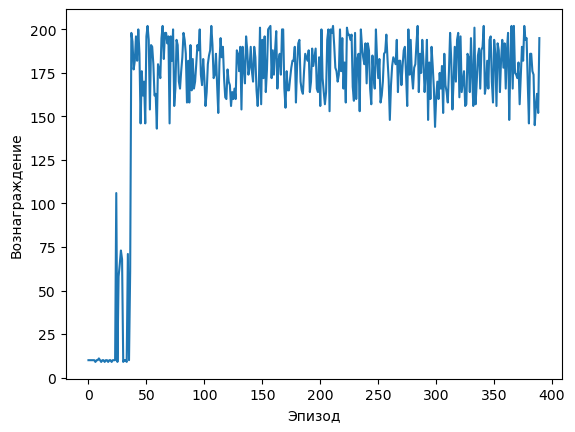

In [22]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [23]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 169.0
Эпизод 2: 197.0
Эпизод 3: 173.0
Эпизод 4: 188.0
Эпизод 5: 190.0
Эпизод 6: 314.0
Эпизод 7: 163.0
Эпизод 8: 304.0
Эпизод 9: 189.0
Эпизод 10: 284.0
Эпизод 11: 373.0
Эпизод 12: 298.0
Эпизод 13: 173.0
Эпизод 14: 500.0
Эпизод 15: 306.0
Эпизод 16: 180.0
Эпизод 17: 204.0
Эпизод 18: 354.0
Эпизод 19: 364.0
Эпизод 20: 241.0
Эпизод 21: 170.0
Эпизод 22: 308.0
Эпизод 23: 318.0
Эпизод 24: 310.0
Эпизод 25: 226.0
Эпизод 26: 228.0
Эпизод 27: 262.0
Эпизод 28: 214.0
Эпизод 29: 202.0
Эпизод 30: 284.0
Эпизод 31: 408.0
Эпизод 32: 174.0
Эпизод 33: 437.0
Эпизод 34: 254.0
Эпизод 35: 223.0
Эпизод 36: 218.0
Эпизод 37: 214.0
Эпизод 38: 174.0
Эпизод 39: 214.0
Эпизод 40: 212.0
Эпизод 41: 164.0
Эпизод 42: 211.0
Эпизод 43: 442.0
Эпизод 44: 236.0
Эпизод 45: 287.0
Эпизод 46: 160.0
Эпизод 47: 246.0
Эпизод 48: 168.0
Эпизод 49: 342.0
Эпизод 50: 264.0
Эпизод 51: 319.0
Эпизод 52: 190.0
Эпизод 53: 204.0
Эпизод 54: 228.0
Эпизод 55: 241.0
Эпизод 56: 210.0
Эпизод 57: 210.0
Эпизод 58: 226.0
Эпизод 59: 307.0
Эпизод

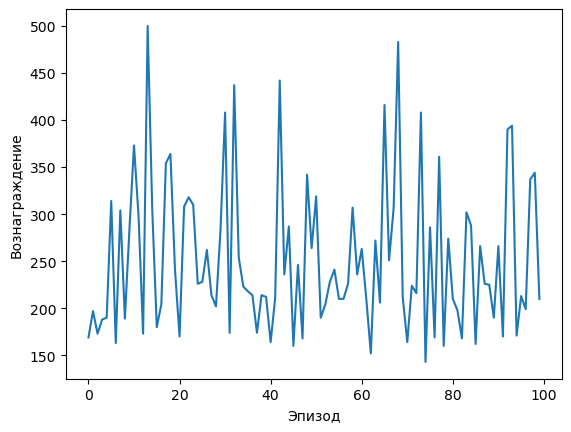

In [24]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [25]:
state = env.reset()[0]
state = torch.from_numpy(state).float()
print(state)
print(best_weight)
z = torch.matmul(state, best_weight)#вероятности действия
print("Z ",z)
probs = torch.nn.Softmax()(z)#производные вероятностей действия
print("Softmax(Z) ", probs)
action = int(torch.bernoulli(probs[1]).item())
print(action)
d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
print("d_softmax ", d_softmax)
d_log = d_softmax[action] / probs[action]
print(d_log)
grad = state.view(-1, 1) * d_log
print(grad)

tensor([-0.0422,  0.0400,  0.0443,  0.0079])
tensor([[3.1143, 1.8907],
        [1.4510, 2.2591],
        [1.5280, 3.3743],
        [2.4298, 3.5077]])
Z  tensor([0.0134, 0.1878])
Softmax(Z)  tensor([0.4565, 0.5435])
1
d_softmax  tensor([[ 0.2481, -0.2481],
        [-0.2481,  0.2481]])
tensor([-0.4565,  0.4565])
tensor([[ 0.0193, -0.0193],
        [-0.0182,  0.0182],
        [-0.0202,  0.0202],
        [-0.0036,  0.0036]])


In [26]:
def run_episode_strategy(env, weight):
    state = env.reset()[0]
    grads = []
    reward_sum = 0
    is_done = False
    is_break = False

    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)#вероятности действия
        probs = torch.nn.Softmax()(z)#производные вероятностей действия
        action = int(torch.bernoulli(probs[1]).item())

        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]

        grad = state.view(-1, 1) * d_log
        grads.append(grad)

        state, reward, is_done, is_break, _ = env.step(action)
        reward_sum += reward
        
    
    return reward_sum, grads

In [27]:
total_rewards = []
weight = torch.rand(n_state, n_action).float()
learning_rate = 0.001

for num in range(1000):
    reward_sum, grads = run_episode_strategy(env, weight)
    print('Эпизод {}: {} '.format(num+1, reward_sum))
    for i, grad in enumerate(grads):
        weight += learning_rate * grad * (reward_sum - i)
    
    total_rewards.append(reward_sum)




Эпизод 1: 10.0 
Эпизод 2: 8.0 
Эпизод 3: 14.0 
Эпизод 4: 19.0 
Эпизод 5: 21.0 
Эпизод 6: 10.0 
Эпизод 7: 21.0 
Эпизод 8: 14.0 
Эпизод 9: 11.0 
Эпизод 10: 18.0 
Эпизод 11: 21.0 
Эпизод 12: 9.0 
Эпизод 13: 10.0 
Эпизод 14: 9.0 
Эпизод 15: 8.0 
Эпизод 16: 35.0 
Эпизод 17: 12.0 
Эпизод 18: 12.0 
Эпизод 19: 26.0 
Эпизод 20: 22.0 
Эпизод 21: 16.0 
Эпизод 22: 13.0 
Эпизод 23: 12.0 
Эпизод 24: 9.0 
Эпизод 25: 14.0 
Эпизод 26: 13.0 
Эпизод 27: 13.0 
Эпизод 28: 38.0 
Эпизод 29: 20.0 
Эпизод 30: 14.0 
Эпизод 31: 15.0 
Эпизод 32: 30.0 
Эпизод 33: 12.0 
Эпизод 34: 46.0 
Эпизод 35: 18.0 
Эпизод 36: 57.0 
Эпизод 37: 23.0 
Эпизод 38: 19.0 
Эпизод 39: 13.0 
Эпизод 40: 13.0 
Эпизод 41: 17.0 
Эпизод 42: 20.0 
Эпизод 43: 41.0 
Эпизод 44: 13.0 
Эпизод 45: 57.0 
Эпизод 46: 16.0 
Эпизод 47: 17.0 
Эпизод 48: 22.0 
Эпизод 49: 68.0 
Эпизод 50: 33.0 
Эпизод 51: 43.0 
Эпизод 52: 45.0 
Эпизод 53: 22.0 
Эпизод 54: 48.0 
Эпизод 55: 17.0 
Эпизод 56: 39.0 
Эпизод 57: 25.0 
Эпизод 58: 94.0 
Эпизод 59: 16.0 
Эпизод 60: 

In [28]:
weight

tensor([[ 4.0021, -2.8920],
        [-5.2118,  5.5824],
        [-6.4727,  7.5771],
        [-8.5504,  9.2368]])

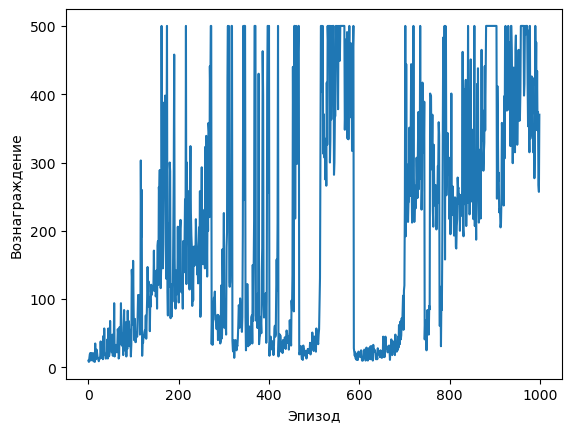

In [29]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [30]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 411.0
Эпизод 2: 267.0
Эпизод 3: 196.0
Эпизод 4: 198.0
Эпизод 5: 212.0
Эпизод 6: 190.0
Эпизод 7: 218.0
Эпизод 8: 263.0
Эпизод 9: 295.0
Эпизод 10: 195.0
Эпизод 11: 260.0
Эпизод 12: 214.0
Эпизод 13: 298.0
Эпизод 14: 194.0
Эпизод 15: 188.0
Эпизод 16: 218.0
Эпизод 17: 277.0
Эпизод 18: 222.0
Эпизод 19: 397.0
Эпизод 20: 183.0
Эпизод 21: 244.0
Эпизод 22: 332.0
Эпизод 23: 189.0
Эпизод 24: 204.0
Эпизод 25: 245.0
Эпизод 26: 146.0
Эпизод 27: 194.0
Эпизод 28: 204.0
Эпизод 29: 186.0
Эпизод 30: 314.0
Эпизод 31: 303.0
Эпизод 32: 317.0
Эпизод 33: 258.0
Эпизод 34: 158.0
Эпизод 35: 384.0
Эпизод 36: 270.0
Эпизод 37: 280.0
Эпизод 38: 500.0
Эпизод 39: 212.0
Эпизод 40: 226.0
Эпизод 41: 186.0
Эпизод 42: 161.0
Эпизод 43: 256.0
Эпизод 44: 252.0
Эпизод 45: 176.0
Эпизод 46: 303.0
Эпизод 47: 244.0
Эпизод 48: 256.0
Эпизод 49: 246.0
Эпизод 50: 296.0
Эпизод 51: 186.0
Эпизод 52: 170.0
Эпизод 53: 229.0
Эпизод 54: 184.0
Эпизод 55: 244.0
Эпизод 56: 172.0
Эпизод 57: 200.0
Эпизод 58: 188.0
Эпизод 59: 158.0
Эпизод

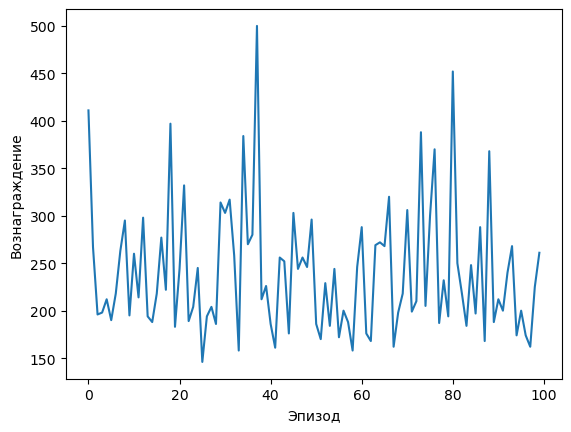

In [31]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()